# Import libraries

In [33]:
pip install PyArabic

Note: you may need to restart the kernel to use updated packages.


In [34]:
! pip install nltk 

In [35]:
! pip install langdetect 

In [37]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expression
from langdetect import detect_langs # language detection
import nltk # natural language processing
from nltk.corpus import stopwords # stopwords
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from pyarabic.araby import strip_tashkeel, strip_tatweel, normalize_hamza, strip_diacritics    # library used for more arabic pre-processing

# `Explore data`

In [38]:
data = pd.read_csv("../data/raw_data.csv") # read data 
data.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       147725 non-null  int64 
 1   dialect  147725 non-null  object
 2   text     147725 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [39]:
# check duplicates 
data.duplicated().sum()

0

In [40]:
# check data balance
(data["dialect"].value_counts()).index, ((data["dialect"].value_counts()).values / len(data)) *100

(Index(['EG', 'LY', 'LB', 'SD', 'MA'], dtype='object'),
 array([39.0157387 , 24.7073955 , 18.69487223,  9.77085801,  7.81113556]))

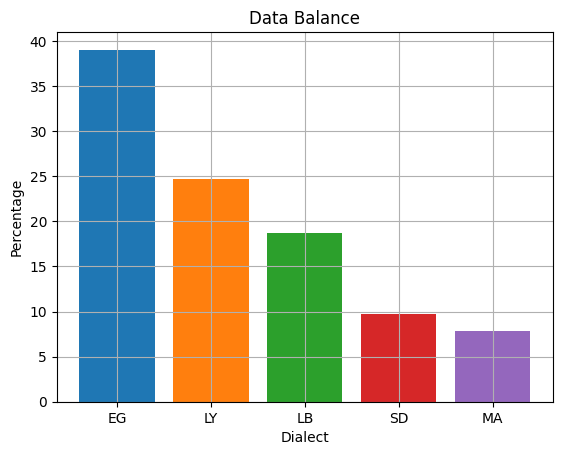

In [41]:
# visualize data balance
plt.bar((data["dialect"].value_counts()).index, ((data["dialect"].value_counts()).values / len(data)) *100
        , color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
        ) # bar plot
plt.title("Data Balance") # title
plt.xlabel("Dialect") # x label
plt.ylabel("Percentage") # y label
plt.grid() # grid

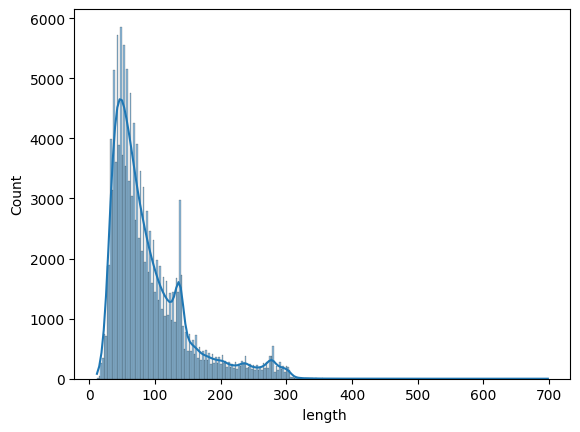

In [42]:
# display average of sentence before cleaning
sns.histplot(data["text"].str.len(), kde=True)
plt.xlabel(' length');

### data impalance EG has most data sample

In [43]:
pd.options.display.max_rows = 200 
pd.options.display.max_columns = 1900
pd.set_option('display.max_colwidth', 1000)

In [44]:
# display samples from data
data["text"][100:200]

100                                                                                                                                                                                                                                     @kawtheraljahmi الله يسلمك، بالتأكيد مفيدة.
101                                                                                                                                                                                                                                    @AAlkoat عيدك مبروك وعقبال داير إن شاء الله.
102                                                                                                                                                                                                                                    @MoheBishte تسلم محي، عيدك مبارك إن شاء الله
103                                                                                                                                                                         

# For cleaning we need
- remove english language
- remove numbers
- remove puncituation 
- remove under score
- remove emojy and strange language
- remove stop words 

In [45]:
def remove_english_language(text):
  pattern = r"[a-zA-Z\s]+"
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [46]:
def remove_numbers(text):
  pattern = r'\d+'
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [47]:
def remove_puncituation(text):
  pattern = r"[^\w\s]"
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [48]:
def remove_uderScore(text):
  pattern = r"_"
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [49]:
def remove_Tifinagh_characters(text): 
  ''' Tifinagh characters are used in Tamazight 
  like ⴰ ⴱ ⵛ ⴷ ⴹ ⴻ ⴼ ⴳ ⵀ ⵃ ⵉ ⵊ ⴽ ⵍ ⵎ ⵏ ⵓ ⵔ ⵕ ⵙ ⵜ ⵡ ⵅ ⵢ ⵣ ⵥ ⵄ ⵅ
  '''
  pattern = r'[\u2D30-\u2D7F]+'
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [50]:
def remove_additional_space(text):
  pattern = r"\s{2,}"
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

### try remove stop words

In [58]:
nltk.download('stopwords')
list_of_stop_words = stopwords.words('arabic')
type(list_of_stop_words)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


list

In [59]:
modified_list_stop_words = []
for word in list_of_stop_words:
    pattern = re.compile(r'\b[إ,أ]')
    # replace the first letter of each word with a dash (-) using re.sub()
    new_word = re.sub(pattern, 'ا', word)
    modified_list_stop_words.append(new_word)

In [60]:
def remove_stop_words(text):
    '''
    This function removes stop words from a sentence
    args:
        text: a string of text
    '''
    # define the regex pattern to match words to remove
    pattern = re.compile(r'\b(' + '|'.join(modified_list_stop_words) + r')\b')
    # remove words from the sentence that appear in the words_to_remove list using re.sub()
    clean_sentence = re.sub(pattern, '', text)
    # print the resulting clean sentence
    return clean_sentence

In [61]:
def remove_repeated_characters(text):
    '''
    This function removes repeated characters from a sentence
    if a character is repeated more than twice
    
    args:
        text: a string of text
    '''
    pattern = r'(.)\1{2,}'
    regex_pattern = re.compile(pattern)
    text = re.sub(regex_pattern,r'\1',text)
    return text

In [62]:
def all_cleaning(text):
    '''
    This function is used to clean the text
    
    '''
    text = remove_english_language(text)
    text = remove_puncituation(text)
    text = remove_numbers(text)
    text = remove_uderScore(text)
    text = remove_Tifinagh_characters(text)
    text = strip_tashkeel(text)
    text = strip_diacritics(text)
    text = strip_tatweel(text)
    text = strip_tashkeel(text)
    text = normalize_hamza(text)
    text = remove_stop_words(text)
    text = remove_repeated_characters(text)
    text = remove_additional_space(text)
   
    return text

In [63]:
cleaned_data = data.copy(deep = False) # copy data 'deep = False' to copy only the reference

In [64]:
# apply to all data
cleaned_data["text"] = cleaned_data["text"].apply(all_cleaning)

In [65]:
cleaned_data.head(25) # display first 5 rows

,id,dialect,text
0,1009754958479151232,LY,قليلين ادب ومنافقين اختهم قريبتهم تتعاكس تقولي عليهم نشاط حقوق المرءة ردة فعلهم
1,1009794751548313600,LY,الليبيين متقلبين بالنسبة ليا ميليشياوي زمان وتوة
2,1019989115490787200,LY,تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها البنات وبيحس كءنه يعرفها زمان بعدين يتزوج وحدة منهن وممكن ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب اند
3,1035479791758135168,LY,رانيا عقليتك متخلفة اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم انسان قليل الادب ثانيا شن ذنب يلي معندهش اب خوت خوات يعني اليتيمة متستحقش تتزوج وثالثا ليش البنت لازم ادير حساب للراجل متستحقش يندارلها حساب عبدة
4,1035481122921164800,LY,شكلك متعقدة علشان الراجل تحبيه ازوج بنت يتيمة بنت معندهش خوت هدي اعصابك وفكينا التخلف امتاعك
5,877881537122979840,LY,دين طاءفة اسف ممكن الغلط غلطتي مكنش قصدي
6,882940840888471552,LY,باهي نستنوه بلكي مشغول حاجة
7,882941769444466688,LY,اختلفنا راه نحنا خوت والله عندي فرحان نقدر انروح لحوشنا وفرحان للناس الاخرى الفرحانة ربي يفرجها وعلينا كلنا
8,882943694906818560,LY,بالنسبة ليا والله شبعت ونكد وقتل ودم والحقد الله يهدينا جميعا
9,884736569118261248,LY,مو نحنا الحياة عندنا مية مية ومعندش شي اندكوا راسنا لبس الشورتات تخلف


In [66]:
# data Example before cleaning and after cleaning random sample
'''
This function will choose a random sample from the data
and display the text before cleaning and after cleaning
by getting the index of data and display it from cleaned_data


args:
    data: data frame
    number_of_samples: number of samples to display
    random_state: random state to choose the sample
'''

def display_random_sample(data, number_of_samples, random_state):
    for i in range(number_of_samples):
        index = np.random.randint(0, len(data))
        print("Before cleaning: ", data["text"][index])
        print("After cleaning: ", cleaned_data["text"][index])
        print("-"*100)
        
display_random_sample(data, 10, 50)


Before cleaning:  يعنى هما طردوا البنت اللى حضنها ولد فى جامعة #الازهر ولم يطردوا الولد 

ايه العنصرية دى 

مجتمع ذكورى متعفن 😼😼

وماله يا سيدى الحضن والنبى مش احسن من الضرب
After cleaning:  يعنى طردوا البنت اللى حضنها ولد فى جامعة الازهر ولم يطردوا الولد العنصرية دى مجتمع ذكورى متعفن وماله سيدى الحضن والنبى مش احسن الضرب
----------------------------------------------------------------------------------------------------
Before cleaning:  حد يشد الممثلين متع هالزفت و يقتلهم و يعلقهم عرايا لين يتعفنوا 
خزيه على الوقت https://t.co/QYViUoyPcF
After cleaning:  حد يشد الممثلين متع هالزفت يقتلهم يعلقهم عرايا لين يتعفنوا خزيه الوقت 
----------------------------------------------------------------------------------------------------
Before cleaning:  @abdalgniabodher تعال بوهديمه كان تبي تعرفه طابور شنو هذا
After cleaning:   تعال بوهديمه تبي تعرفه طابور شنو 
----------------------------------------------------------------------------------------------------
Before cleaning:  يوم الأحد غير كل ا

<AxesSubplot: xlabel='text', ylabel='dialect'>

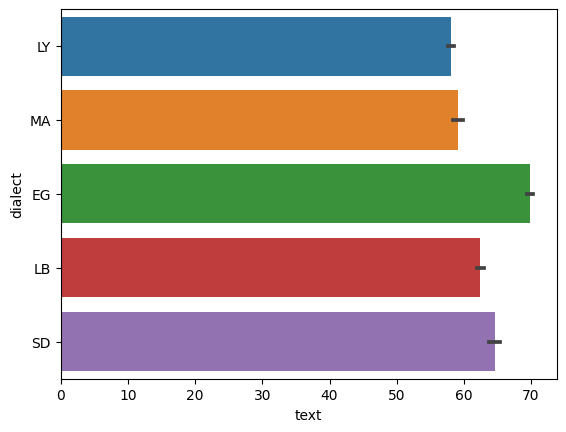

In [67]:
# visualize country that has longest tweets
sns.barplot(x= cleaned_data["text"].str.len(),y= cleaned_data["dialect"])

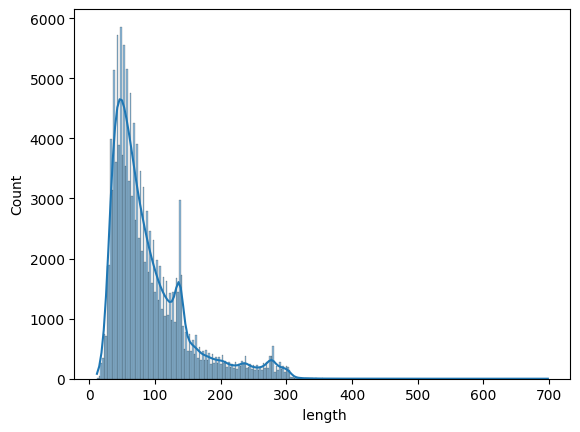

In [68]:
# display average of sentence after cleaning
sns.histplot(data["text"].str.len(), kde=True)
plt.xlabel(' length');

In [69]:
cleaned_data.to_csv("../data/cleaned_data.csv") # save data after clean